In [ ]:
pip install keras tensorflow mnist

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [3]:
# Use this cell to build the model
# initializing the CNN
model = Sequential()

# First Convolution
model.add(Conv2D(16, (7, 7), input_shape = (128, 128, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.15))

# Second Convolution
model.add(Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.15))

model.add(Flatten())

# First Dense Layer
model.add(Dense(activation="relu", units=256))

# Second Dense Layer
model.add(Dense(activation="relu", units=128))

# Final Layer
model.add(Dense(activation="softmax", units=5))

In [4]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      2368      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0

In [5]:
# Use this cell for the train_datagenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
# Use this cell for the test_datagenerator
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
# Use this cell to create a training_set, using the train_datagenerator on the train folder, batch size of 32
training_set = train_datagen.flow_from_directory(
    './assets/data_set/training_set/',
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'categorical')

Found 25060 images belonging to 5 classes.


In [8]:
# Use this cell to create a test_set (which we'll use later on as a validation set), using the test_datagenerator on the test folder, batch size of 32
test_set = test_datagen.flow_from_directory(
    './assets/data_set/test_set/',
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'categorical')

Found 2939 images belonging to 5 classes.


In [9]:
# Use this cell to create an X_test_batch, y_test_batch using the test_set flow
(X_test_batch, y_test_batch) = next(test_set)

In [10]:
# Use this cell to train the model
history = model.fit(training_set,
                    steps_per_epoch = 20,
                    epochs = 40,
                    validation_data = test_set)

Epoch 1/40
20/20 [==============================] - 36s 2s/step - loss: 2.5056 - accuracy: 0.4047 - val_loss: 1.5203 - val_accuracy: 0.4042
Epoch 2/40
20/20 [==============================] - 34s 2s/step - loss: 1.2628 - accuracy: 0.4844 - val_loss: 1.4541 - val_accuracy: 0.4001
Epoch 3/40
 3/20 [===>..........................] - ETA: 7s - loss: 1.0405 - accuracy: 0.5521

C:\Users\Eigenaar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 [==============================] - 35s 2s/step - loss: 1.0645 - accuracy: 0.5859 - val_loss: 1.5468 - val_accuracy: 0.3794
Epoch 4/40
20/20 [==============================] - 34s 2s/step - loss: 0.8534 - accuracy: 0.6672 - val_loss: 1.6507 - val_accuracy: 0.3205
Epoch 5/40
20/20 [==============================] - 36s 2s/step - loss: 0.7550 - accuracy: 0.7250 - val_loss: 1.4728 - val_accuracy: 0.4165
Epoch 6/40
20/20 [==============================] - 36s 2s/step - loss: 0.7577 - accuracy: 0.7359 - val_loss: 1.9574 - val_accuracy: 0.3314
Epoch 7/40
20/20 [==============================] - 35s 2s/step - loss: 0.6627 - accuracy: 0.7641 - val_loss: 1.7432 - val_accuracy: 0.3658
Epoch 8/40
20/20 [==============================] - 35s 2s/step - loss: 0.7180 - accuracy: 0.7437 - val_loss: 1.8272 - val_accuracy: 0.3937
Epoch 9/40
20/20 [==============================] - 35s 2s/step - loss: 0.6752 - accuracy: 0.7469 - val_loss: 1.8474 - val_accuracy: 0.3930
Epoch 10/40
20/20 [============

In [11]:
import pickle

In [12]:

pickle.dump(model, open('model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json              

In [13]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-18 11:09:16         3800
metadata.json                                  2023-01-18 11:09:16           64
variables.h5                                   2023-01-18 11:09:16    201912140
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10


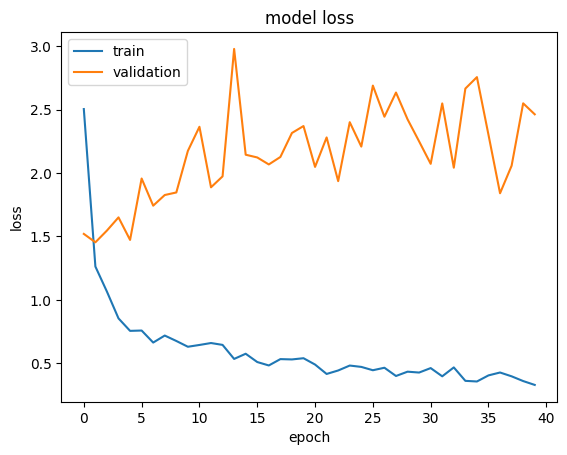

In [14]:
#Use this cell to add the plotlosses function, and plot the history of your training
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plotLosses(history)

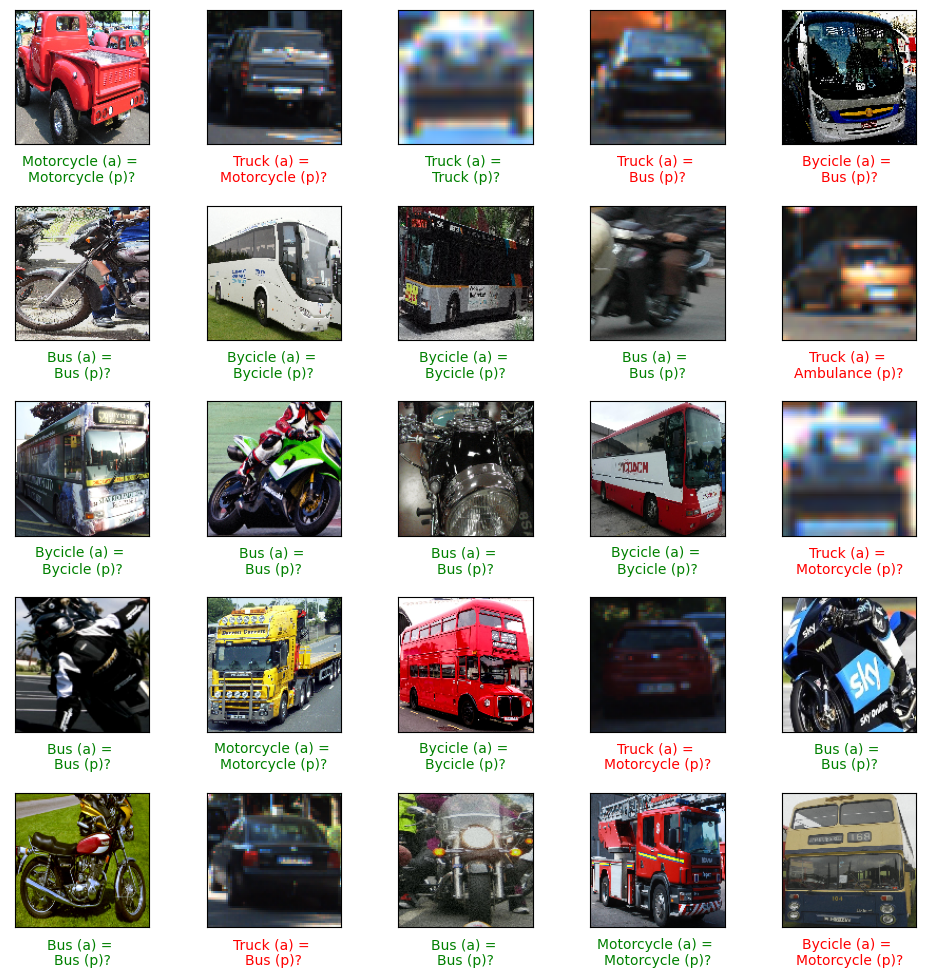

In [15]:
from keras.utils import image_utils

labels = ['Ambulance', 'Bycicle', 'Bus', 'Motorcycle','Truck', 'car' ]

# solution code
plt.figure(figsize=(10,10))
for i in range(25):
    plt.tight_layout(pad=1.5)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(X_test_batch[i], cmap=plt.cm.binary)

    # Predict image
    test_image = image_utils.img_to_array(X_test_batch[i])
    test_image = np.expand_dims(test_image, axis = 0)
    prediction = pickled_model.predict(test_image, verbose = 0) # Verbose = 0 to hide the progress bar
    
    # # print("prediction = " + str(np.argmax(prediction)), "correct = " + str(np.argmax(y_test[i])))

    # Make Label
    label = labels[np.argmax(y_test_batch[i])] + ' (a) = \n' + labels[np.argmax(prediction)] + ' (p)?'
    
    # Print label
    if(labels[np.argmax(y_test_batch[i])] != labels[np.argmax(prediction)]):
        plt.xlabel(label).set_color('red')
    else:
        plt.xlabel(label).set_color('green')

plt.show()

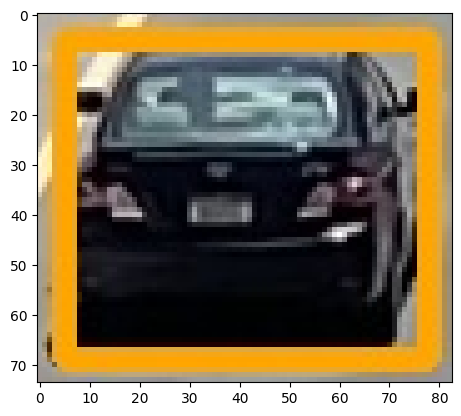

In [20]:
from PIL import Image
from numpy import asarray

image = Image.open('./assets/test fotos/5_speed_85.jpg')
numpydata = asarray(image)

plt.imshow(numpydata, cmap=plt.cm.binary)


In [21]:
import numpy as np
from keras.preprocessing import image
from keras.utils import image_utils

labels = ['Ambulance', 'Bycicle', 'Bus', 'Motorcycle','Truck', 'car' ]

test_image = image_utils.load_img("./assets/test fotos/5_speed_85.jpg", target_size = (128, 128))
test_image = image_utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = pickled_model.predict(test_image)
print(result)

label_p = labels[np.argmax(result)]
    
print(label_p)

1/1 [==============================] - 0s 31ms/step
[[0. 0. 1. 0. 0.]]
Bus
